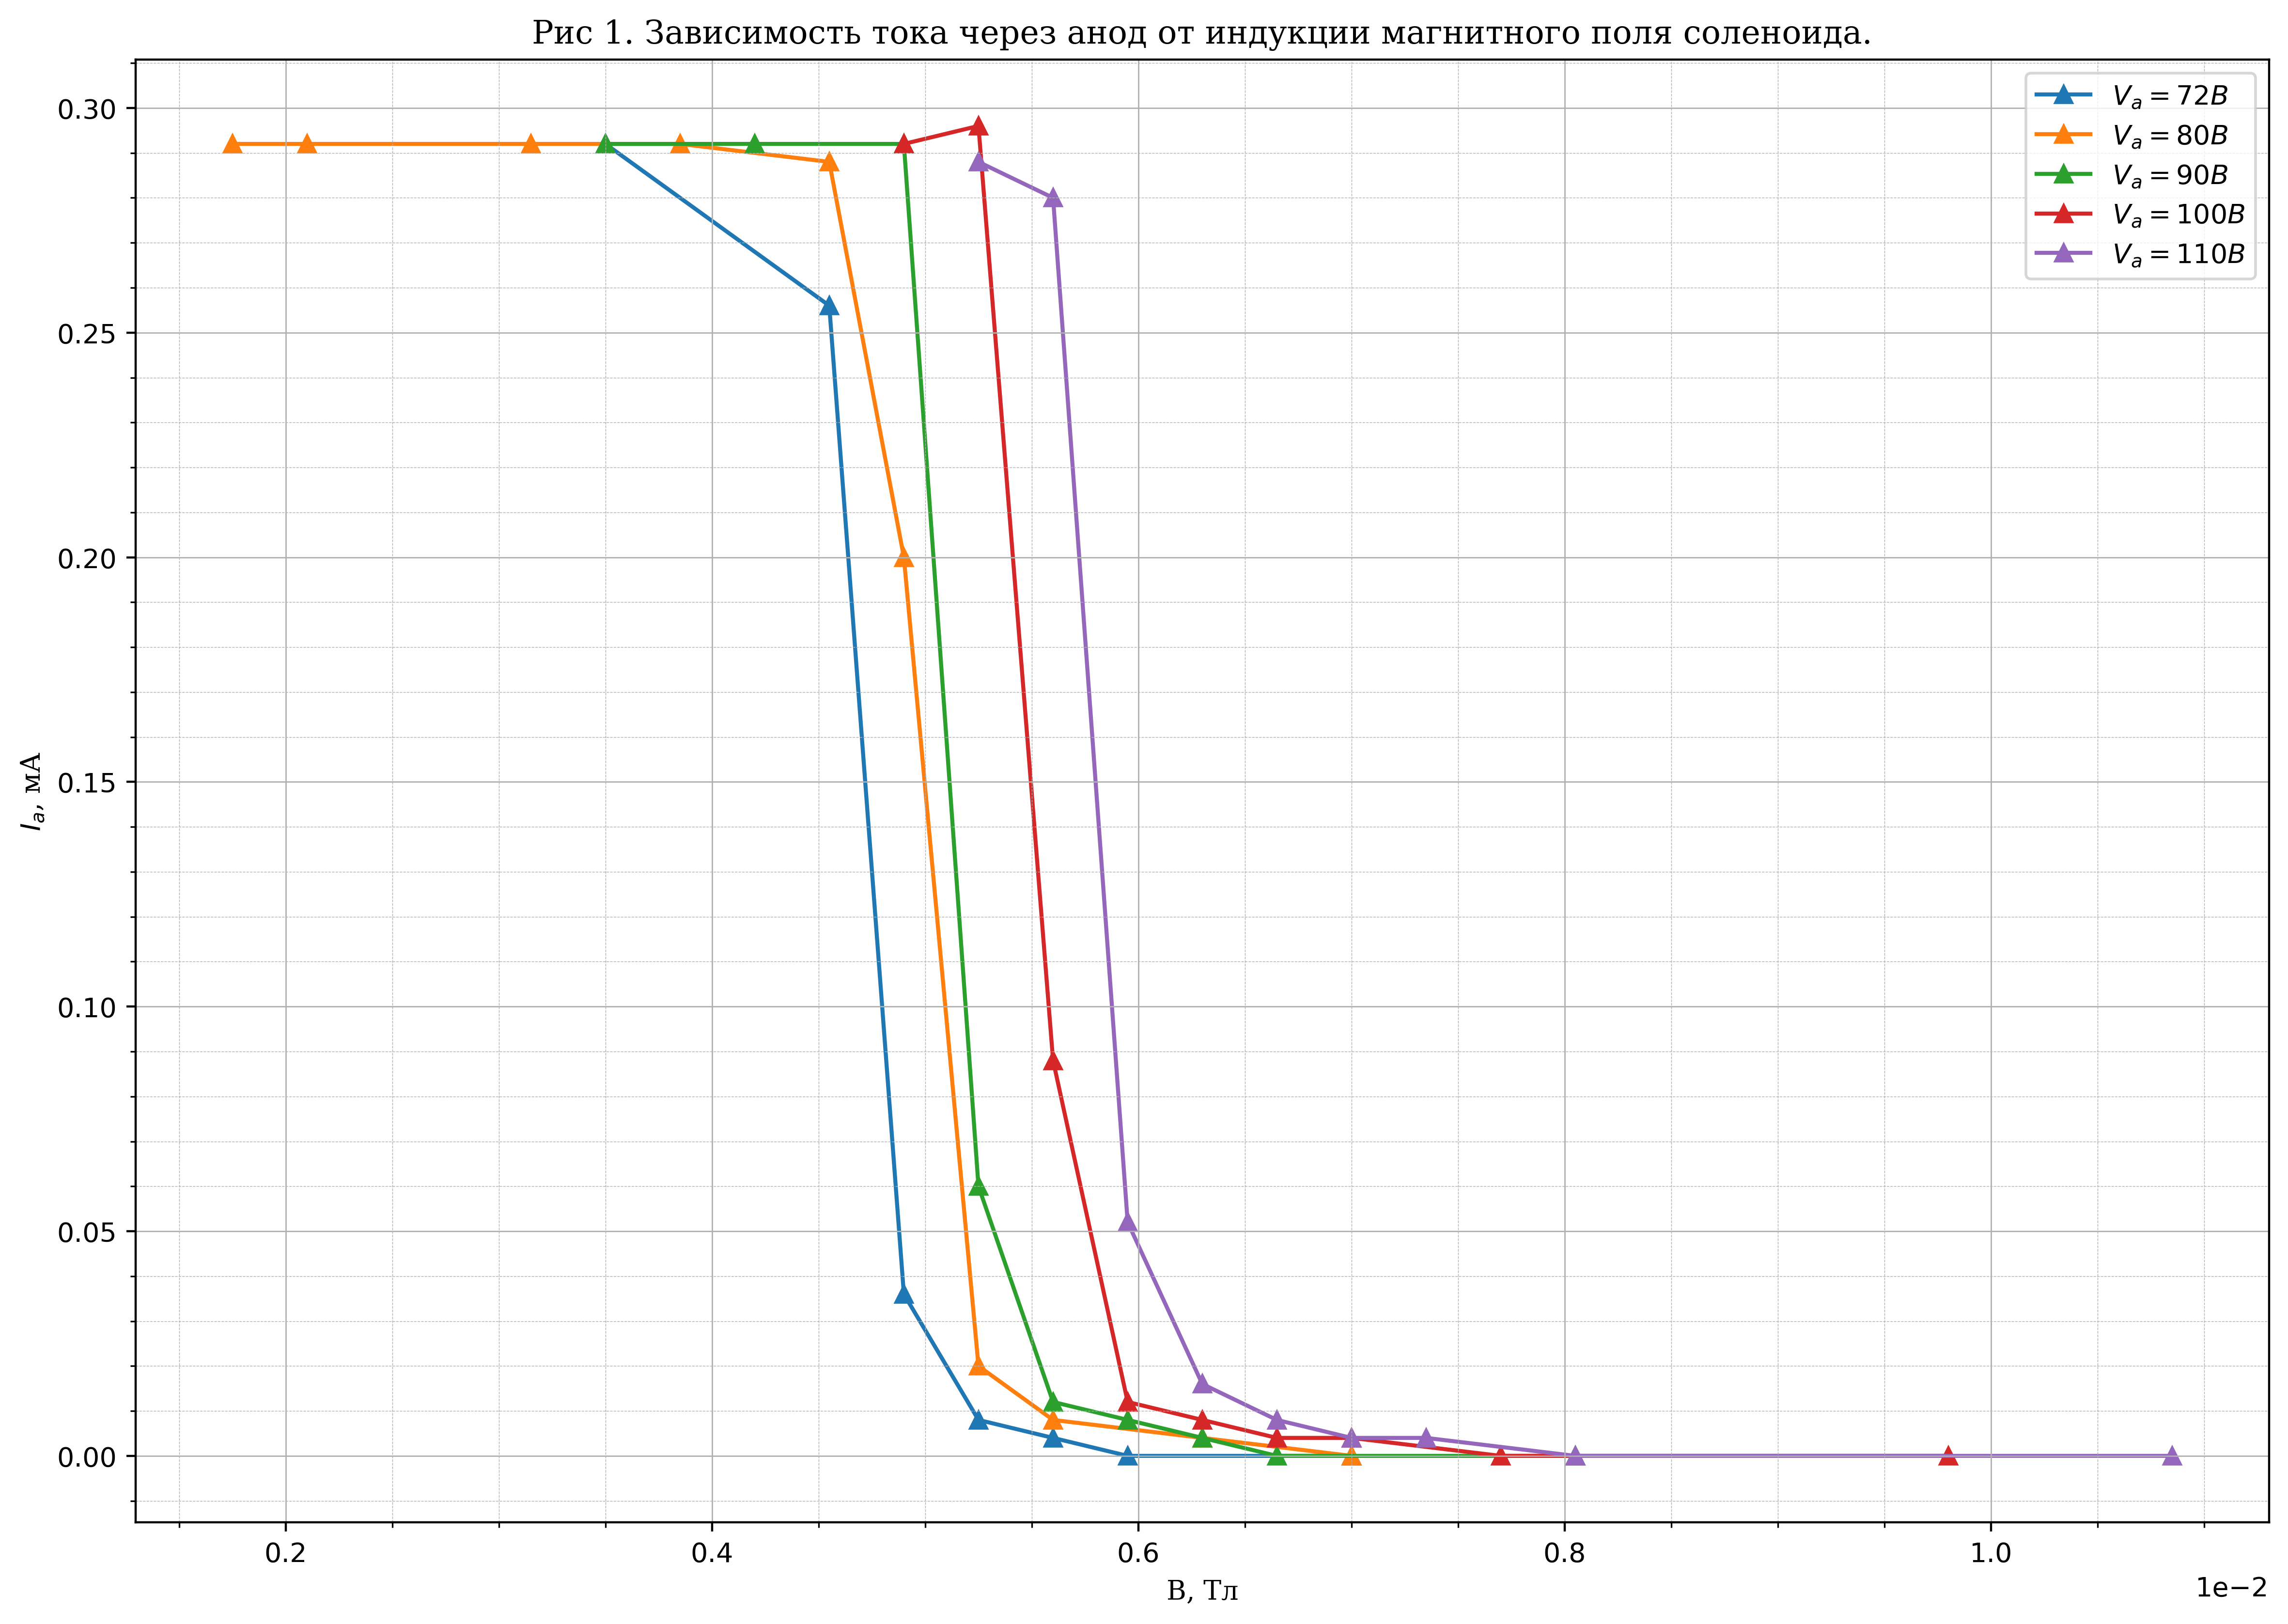

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mygraph as mg
import pandas as pd
#import importlib
#importlib.reload(mg)

fig = mg.make_figure(dpi_mode='high')
ax = fig.add_subplot()
mg.set_grids(fig)
mg.set_label( ax, 'B, Тл', '$I_a$, мА' )
[ax.ticklabel_format(axis='x', scilimits=[0, 0]) for ax in fig.axes]

D72 = pd.read_csv('72.csv')

K = 3.5e-2
B = {
    72: { 'Ia': np.array( [0.292,0.256,0.036,0.008,0.004,0,0] ),
          'B' : np.array( [0.0035,0.00455,0.0049,0.00525,0.0056,0.00595,0.007] ) },
    80: { 'Ia': np.array( [0.292,.292,.292,.292,.288,.2,.02,.008,.004,0 ] ),
           'B': np.array( [0.05, 0.06, .09,.11,.13,.14,.15,.16,.18,.20] ) * K },
    90: { 'Ia': np.array( [.292,.292,.292,.06,.012,.008,.004,0,0] ),
          'B': np.array( [.10,.12,.14,.15,.16,.17,.18,.19,.23] ) * K },
    100: { 'Ia': np.array( [.292,.296,.088,.012,.008,.004,.004,0,0] ),
          'B': np.array( [.14,.15,.16,.17,.18,.19,.20,.22,.28] ) * K },
    110: { 'Ia': np.array( [.288,.28,.052,.016,.008,.004,.004,0,0] ),
          'B': np.array( [.15,.16,.17,.18,.19,.20,.21,.23,.31] ) * K}
}


mg.set_title(ax, 'Зависимость тока через анод от индукции магнитного поля соленоида.')

#ax.plot(B[72]['B'], B[72]['Ia'], marker='^', label='$V_a = 72$', zorder=1)
ax.plot(D72['B'], D72['Ia'], marker='^', label='$V_a = 72В$', zorder=1)
ax.plot(B[80]['B'], B[80]['Ia'], marker='^', label='$V_a = 80В$', zorder=1)
ax.plot(B[90]['B'], B[90]['Ia'], marker='^', label='$V_a = 90В$', zorder=1)
ax.plot(B[100]['B'], B[100]['Ia'], marker='^', label='$V_a = 100В$', zorder=1)
ax.plot(B[110]['B'], B[110]['Ia'], marker='^', label='$V_a = 110В$', zorder=1)
ax.legend()

Коэффиценты прямой: k, s_k, b, s_b
4.523786828422912e-07	1.1689322221711982e-08	-8.405329289431278e-07	1.5883720124427866e-07
1.23E+11 +- 3.81E+07
Относительная пошрешность гамма = 2.58396840193001%
1.76E+11


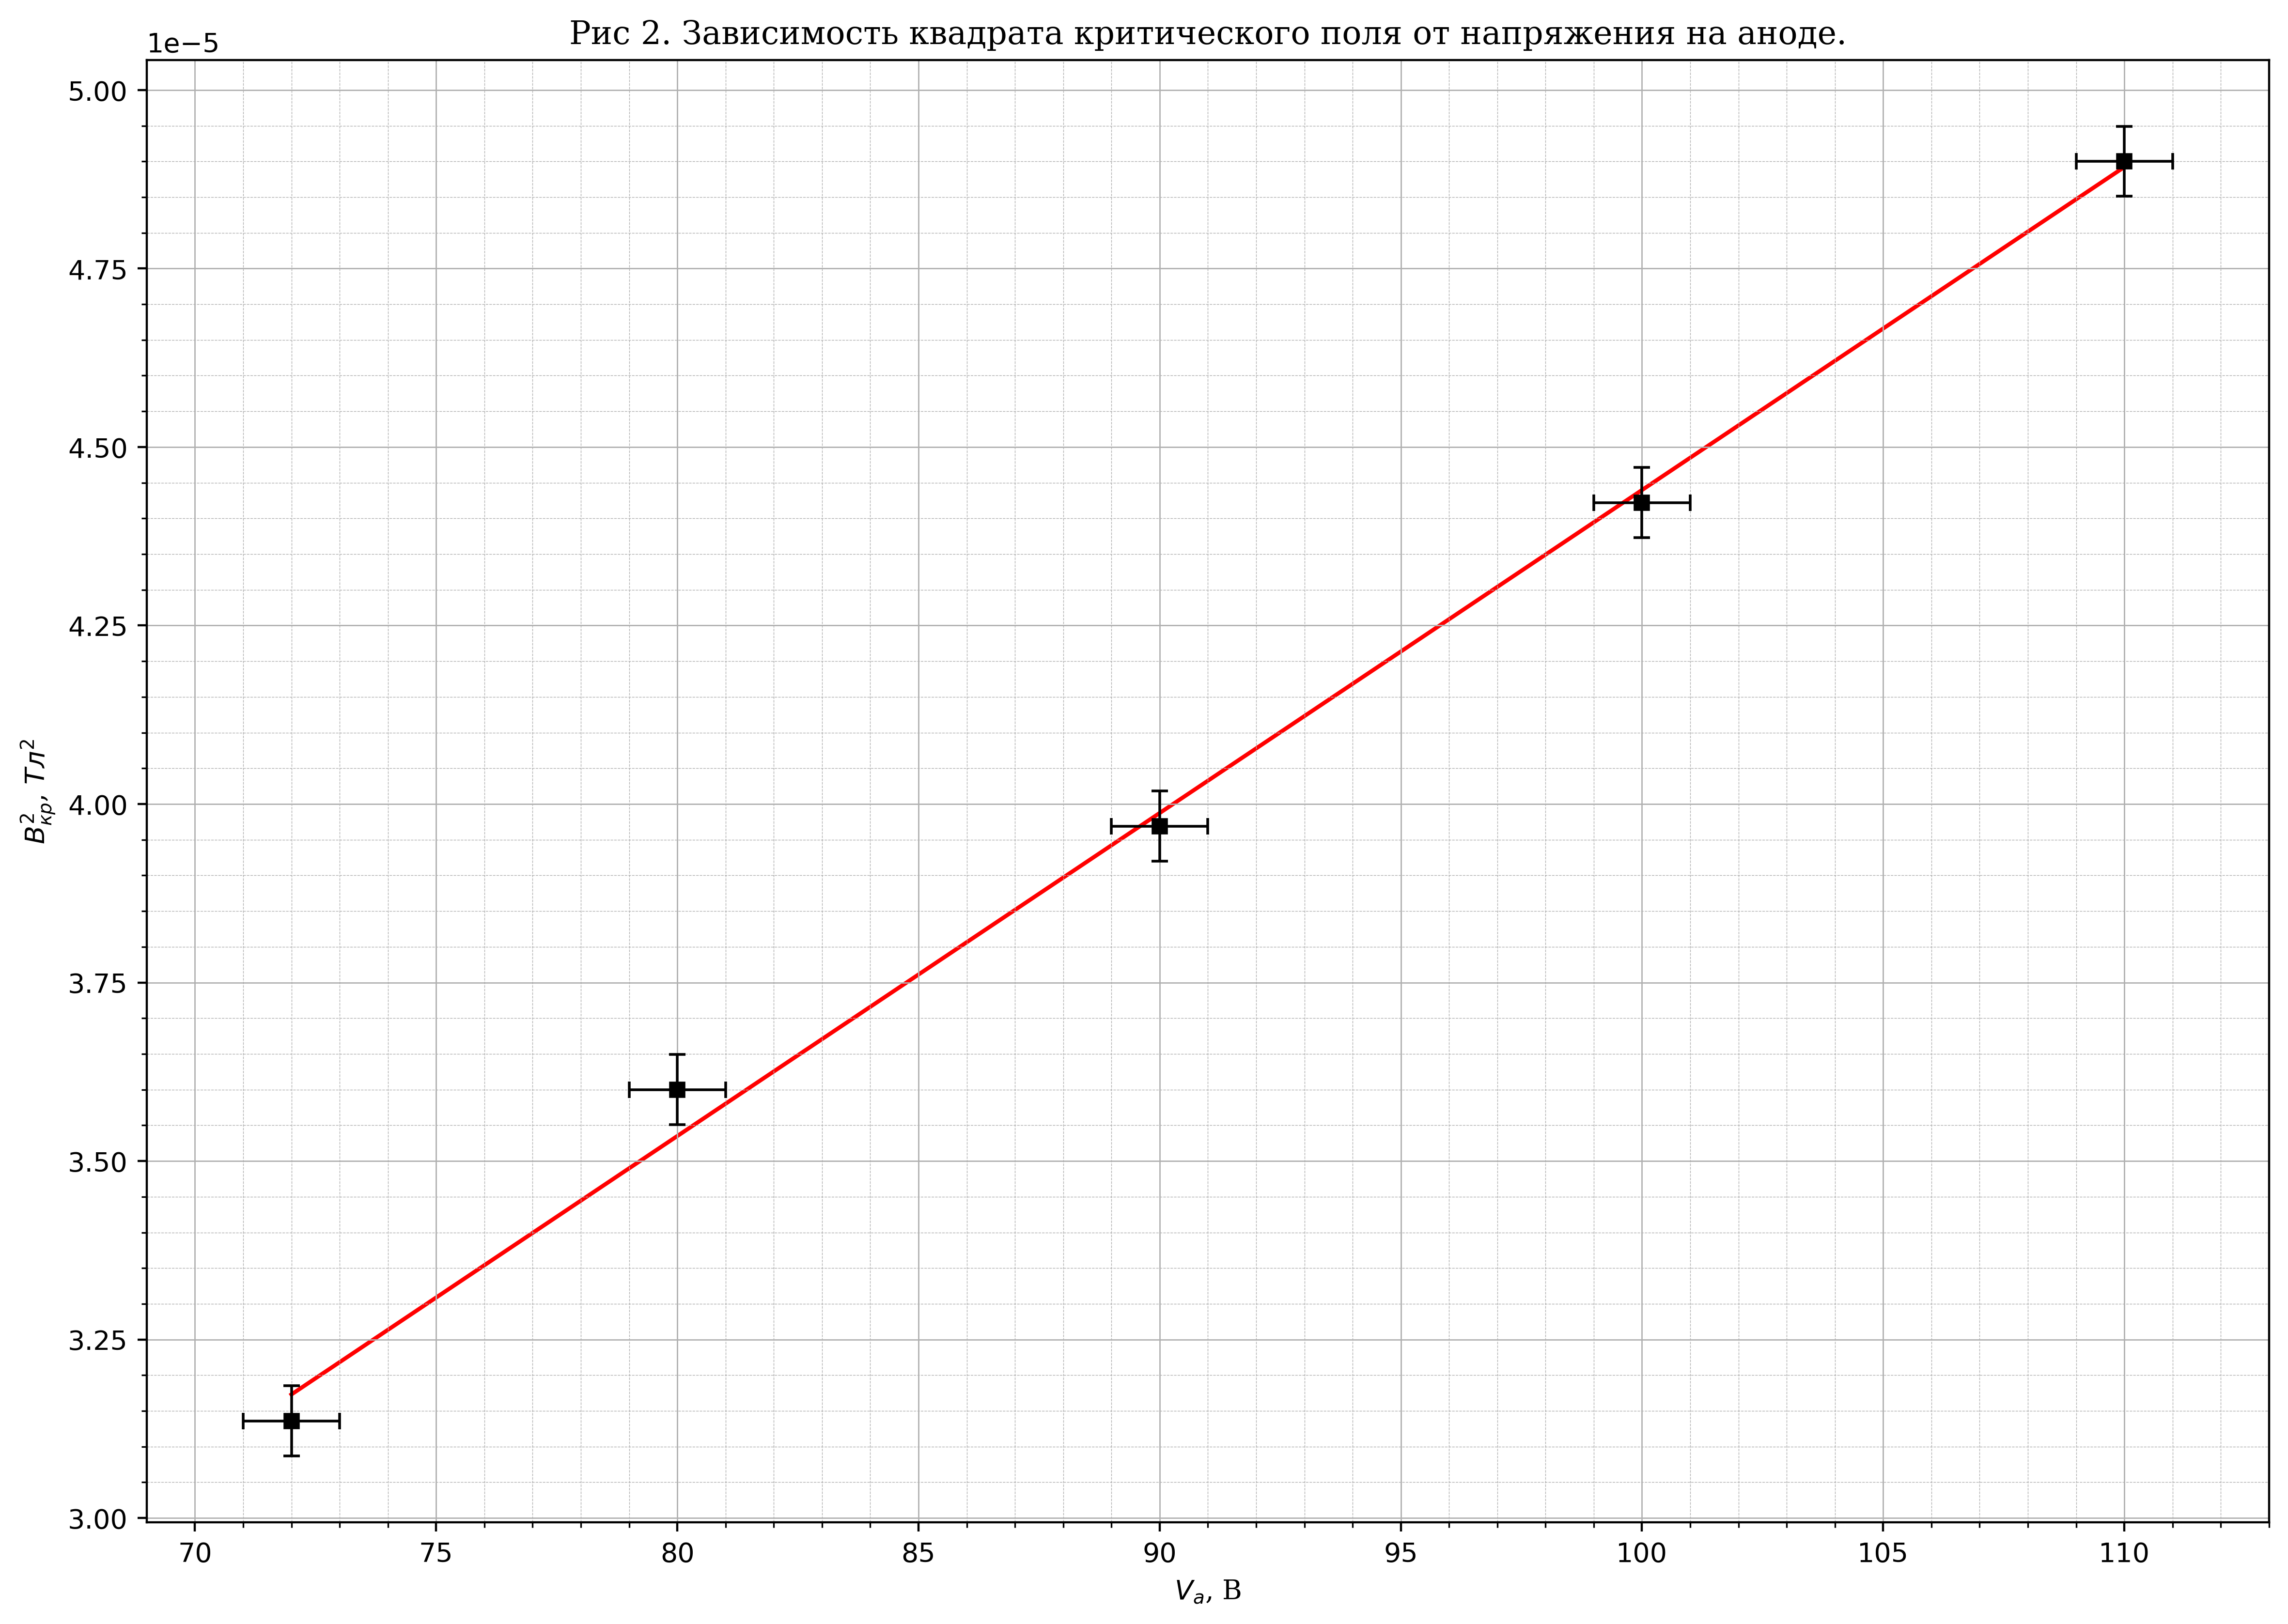

In [2]:
import numpy as np
import mygraph as mg

#import importlib
#importlib.reload(mg)

Bs = np.array( [0.0056, .006,.0063,.00665,.007] )
Bs = Bs ** 2
Vs = np.array( [72, 80, 90, 100, 110] )

fig = mg.make_figure(dpi_mode='high')
ax = fig.add_subplot()
mg.set_grids(fig)
mg.set_label(ax, '$V_a$, В', '$B_{кр}^2$, $Тл^2$',)
[ax.ticklabel_format(axis='y', scilimits=[0, 0]) for ax in fig.axes]


X_ERR = .5 * 2
Y_ERR = (2 * .01)**2 * K**2
mg.draw_errorbar(ax, Vs, Bs, X_ERR, Y_ERR)
mg.set_title(ax, 'Зависимость квадрата критического поля от напряжения на аноде.')

(k, s_k, b, s_b) = mg.linls(Vs, Bs, through_null=False)
mg.display_linls(ax)

r_a = 12e-3
gamma = 8 / (k * r_a ** 2)
sigma_gamma = (8 / r_a) * (s_k / k**2)
print(f'{gamma:.2E} +- {sigma_gamma:.2E}')
print(f'Относительная пошрешность гамма = {s_k / k * 100}%')
actual = 1.602176634e-19 / 9.109383701528e-31
print(f'{actual:.2E}')



Погрешность суммы b1 + b2 = 0.0005999083905718754 
Коэффиценты прямой: k, s_k, b, s_b
0.025717255205279718	0.00019340343944688058	-0.002111317482928518	0.00033029925366323895
gamma = 1.95E+09 +- 2.94E+07
1.5040752825532882


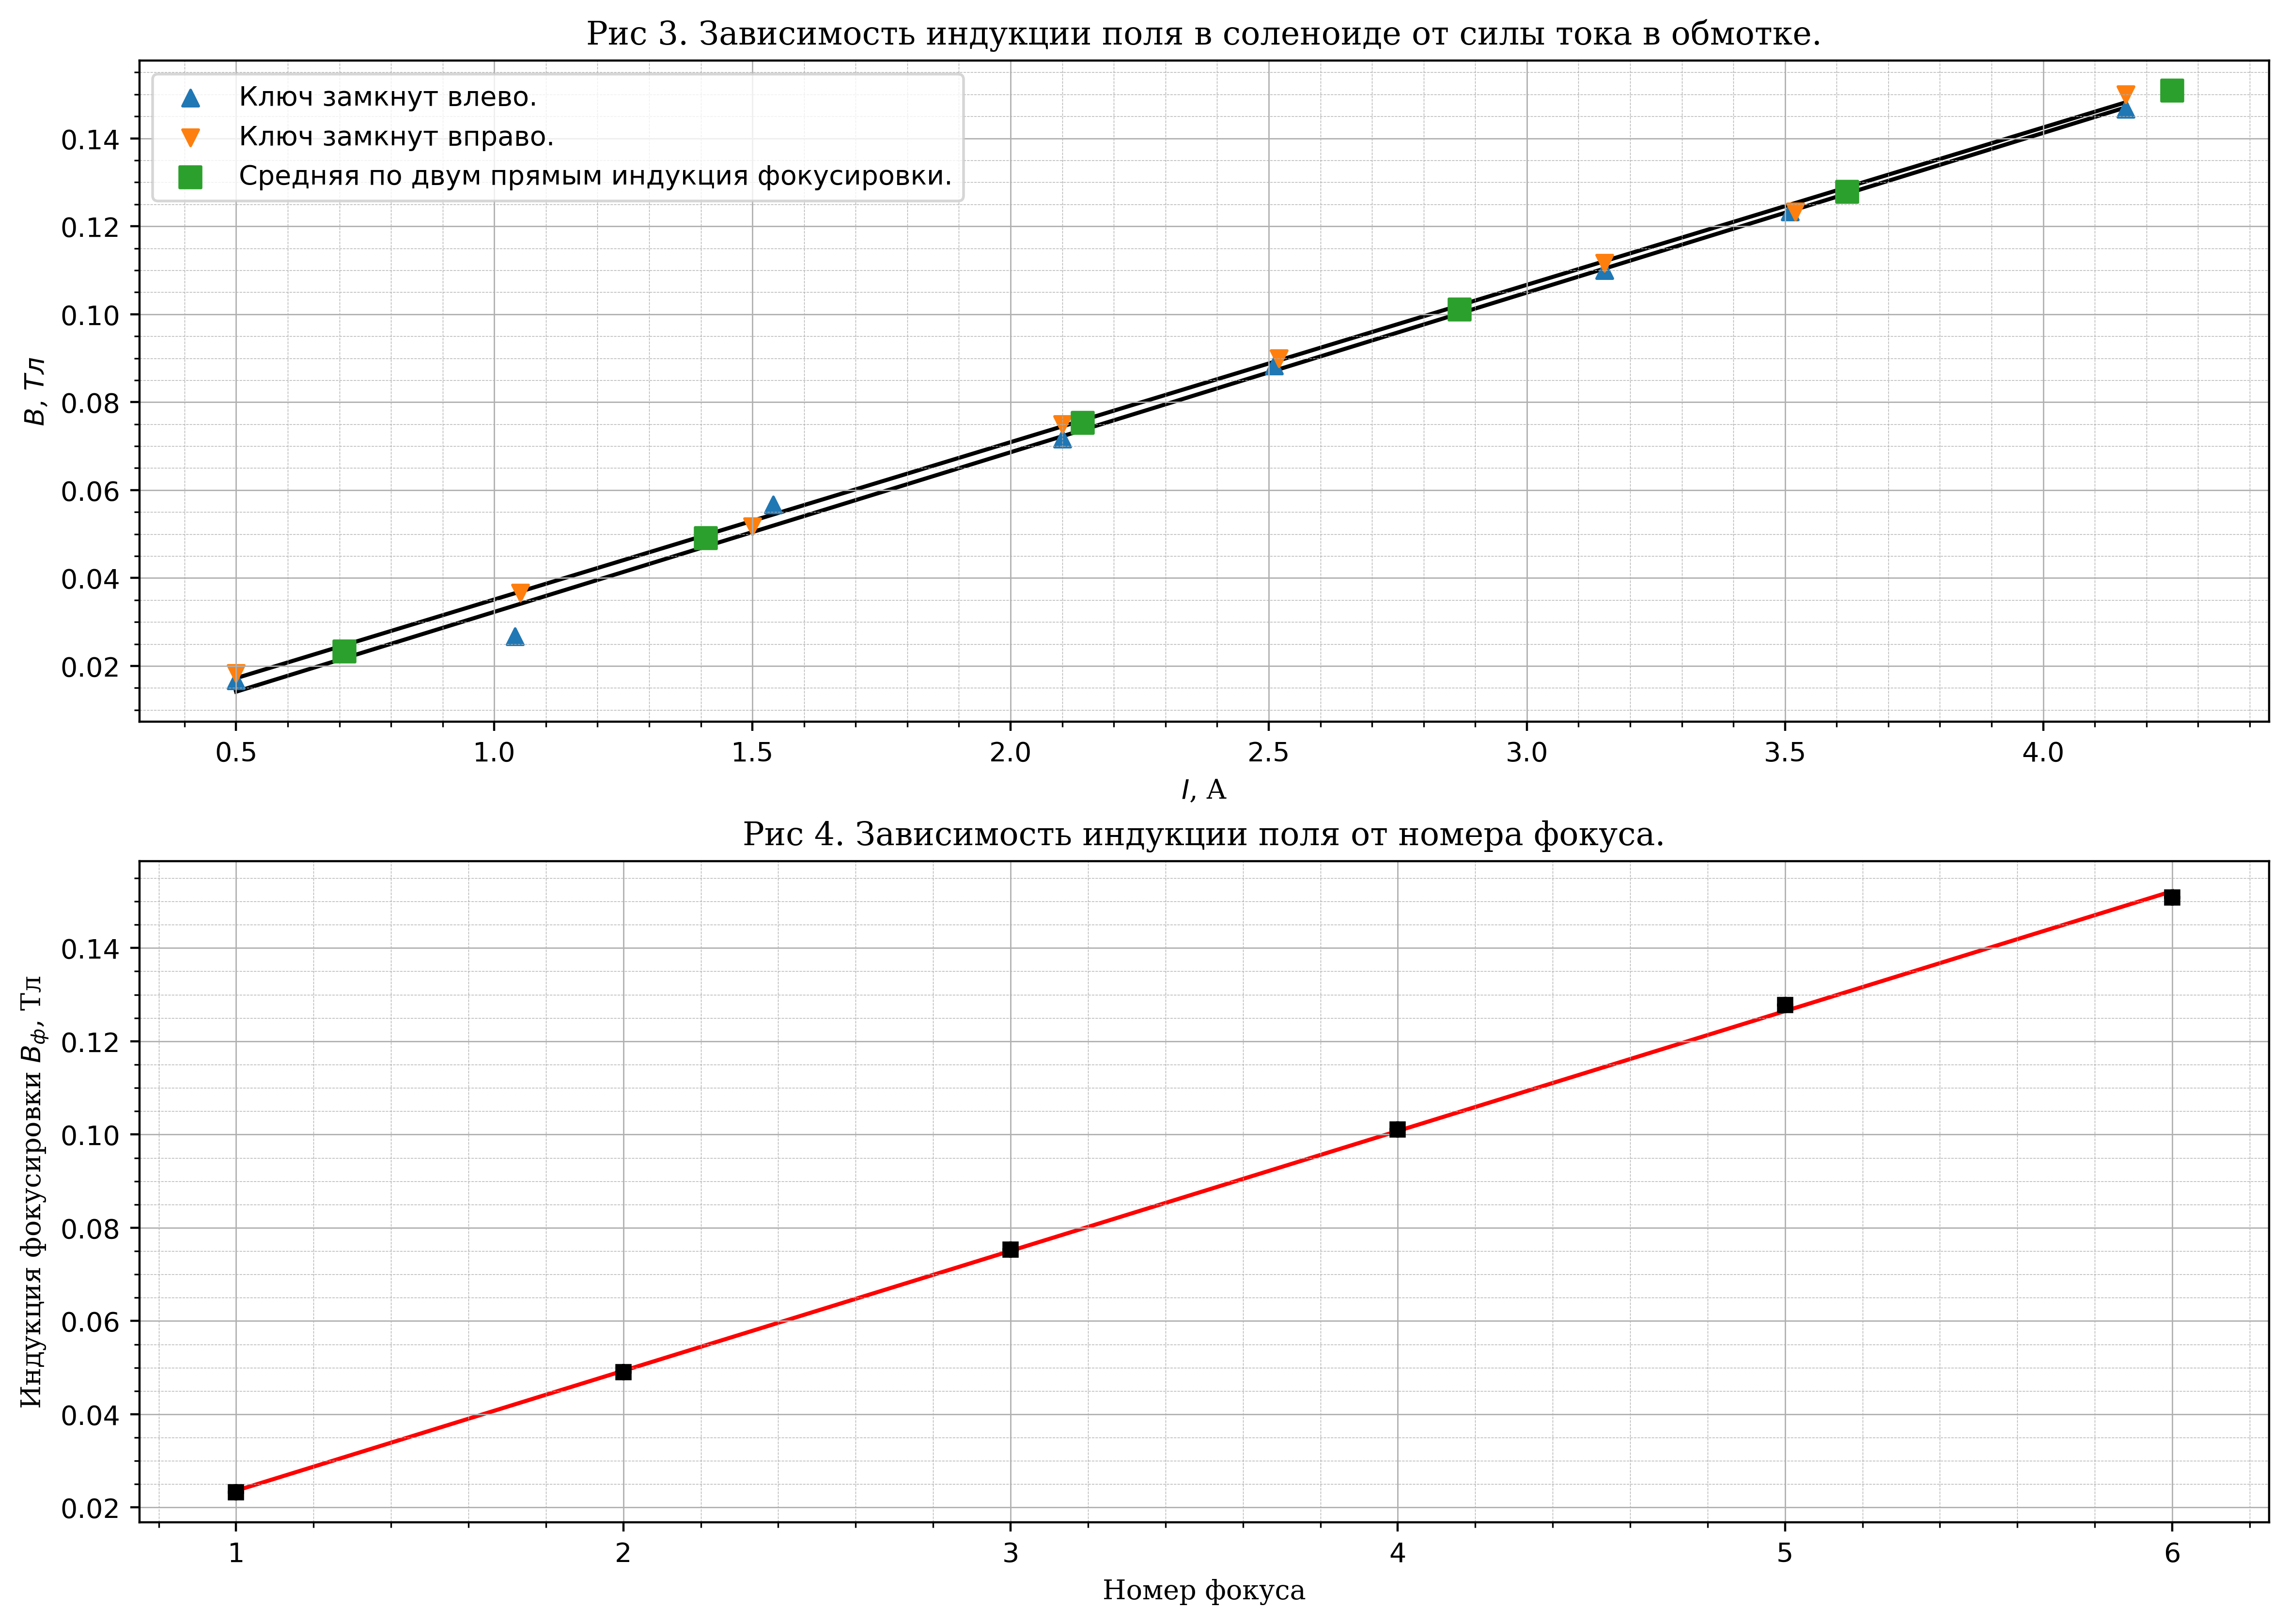

In [3]:
SN = 3000e-4 # м^2

Bs_left = np.array ( [
    52 - 47,
    46.5 - 38.5,
    50 - 33,
    48.5 - 27,
    50 - 23.5,
    51 - 18,
    51 - 14,
    53 - 9
] ) * 1e-3 / SN
Is_left = np.array( [
    0.5,
    1.04,
    1.54,
    2.10,
    2.51,
    3.15,
    3.51,
    4.16
])

Bs_right = np.array( [
    56.5 - 51,
    61 - 50,
    63 - 47.5,
    71.5 - 49,
    76 - 49,
    80 - 46.5,
    87.5 - 50.5,
    86 - 41
] ) * 1e-3 / SN
Is_right = np.array ( [
    0.5,
    1.05,
    1.5,
    2.1,
    2.52,
    3.15,
    3.52,
    4.16
] )

fig = mg.make_figure(dpi_mode='high')
spec = fig.add_gridspec(2, 1)
ax = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[1, 0])
mg.set_grids(fig)


mg.set_label(ax2, 'Номер фокуса', 'Индукция фокусировки $B_ф$, Тл')

ax.scatter(Is_left, Bs_left, marker='^', label='Ключ замкнут влево.')
(k1, s_k1, b1, s_b1) = mg.linls(Is_left, Bs_left)
mg.display_linls(ax, text=False, color='k')

ax.scatter(Is_right, Bs_right, marker='v', label='Ключ замкнут вправо.')
(k2, s_k2, b2, s_b2) = mg.linls(Is_right, Bs_right)
mg.display_linls(ax, text=False, color='k')

print(f'Погрешность суммы b1 + b2 = { 0.5 * np.sqrt(s_b1*s_b1 + s_b2*s_b2)} ')
ax.legend()

I_left = np.array ( [
    0.71,
    1.44,
    2.17,
    2.87,
    3.60,
    4.25
] )
B_left = I_left * k1 + b1
I_right = np.array ( [
    0.71,
    1.41,
    2.14,
    2.87,
    3.62,
    4.25
] )
B_right = I_right * k2 + b2
B = (B_left + B_right) / 2

ns = np.array( list(range(1, len(I_left) + 1)) )
mg.set_label(ax, '$I$, А', '$B$, $Тл$')
mg.set_title(ax, 'Зависимость индукции поля в соленоиде от силы тока в обмотке.')
ax.scatter(I_right, B, zorder=2, label='Средняя по двум прямым индукция фокусировки.', s=60, marker='s')
ax.legend()

mg.set_title(ax2, 'Зависимость индукции поля от номера фокуса.')

X_ERR = 0
Y_ERR = 0.5 * 1e-3 / SN
mg.draw_errorbar(ax2, ns, B)

(k3, s_k3, b3, s_b3) = mg.linls(ns, B, through_null=False)
mg.display_linls(ax2)

V = 1.15e3  
L = 26.5e-2
gamma = 8 * np.pi * np.pi * V / (L * L * k3 * k3)
betta = 8 * np.pi * np.pi * V / (L * L)
sigma = 2 * betta * s_k3 / (k3*k3*k3)
print(f'gamma = {gamma:.2E} +- {sigma:.2E}')
print(2 * s_k3 / k3 * 100)